In [18]:
# import stuff
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.stats as spstats
from behavior_analysis import process_data as pd
import behavior_analysis as bd
from glob import glob
import os


%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
cageNum = "4058541."
home = "/Volumes/mplitt/VR/2AFC_V3/"
dropboxFolder = "/Users/markplitt/Dropbox/GiocomoLab/12_19_labmeeting/"

mice = ["1","2","3","4"]



(21, 2)


/Users/markplitt/repos/2AFC_VR/lick_data/2AFC_V3/behavior_analysis.py:140: RuntimeWarning: Mean of empty slice
  if np.isnan(lRT_mu[i]) and not np.isnan(rRT_mu[i]):


(13, 2)


/Users/markplitt/repos/2AFC_VR/lick_data/2AFC_V3/behavior_analysis.py:141: RuntimeWarning: Mean of empty slice
  combRT_mu.append(rRT_mu[i])


(17, 2)
(15, 2)


FileNotFoundError: [Errno 2] No such file or directory: '~/Dropbox/GiocomoLab/12_19_labmeeting/LearningCurves.pdf'

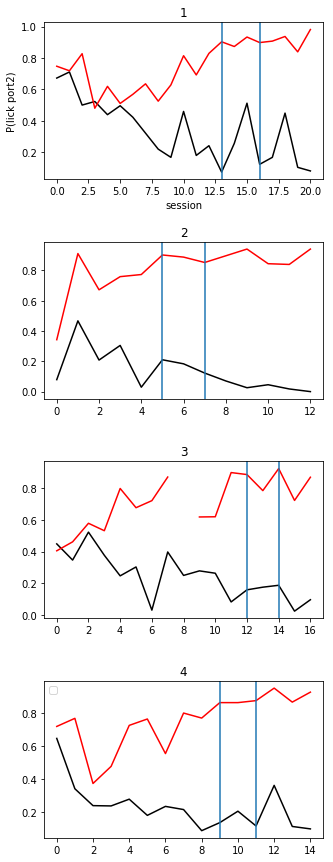

In [132]:
# Learning Curves
f, axarr = plt.subplots(4,1,figsize = (5,15))
f.subplots_adjust(hspace=.4)
for i, mouse in enumerate(mice):
    
    
    oneSidedFiles = glob(home+cageNum+mouse+"/OneSidedCues_noservo_*Licks.txt")
    halfOneSidedFiles = glob(home+cageNum+mouse+"/HalfOneSidedCue_noservo_*Licks.txt")
    AFCTrainFiles = glob(home+cageNum+mouse+"/2AFC_Train_noservo_*Licks.txt")
    allFiles = [i for i in oneSidedFiles]
    #print(allFiles)
    allFiles.extend(halfOneSidedFiles)
    allFiles.extend(AFCTrainFiles)
    
    fileBDays = [os.stat(path_to_file).st_birthtime for path_to_file in allFiles]
    sortedFiles = [x for _, x in sorted(zip(fileBDays,allFiles), key=lambda pair: pair[0])]
    sortedSessions = [i.split(home+cageNum+mouse+"/")[1].split("_Licks.txt")[0] for i in sortedFiles]
    c = pd(cageNum+mouse,sortedSessions,basedir='home')
    c.save_sessions()
    
    R,D = c.load_sessions()
    PR = bd.plot_learning_curve(R,title=mouse,toPlot=False)
    print(PR.shape)
    axarr[i].plot(PR[:,0],'k',PR[:,1],'r')
    if i == 0:
        plt.legend(['context 1','context 2'])
        axarr[0].set_ylabel('P(lick port2)')
        axarr[0].set_xlabel('session')
        
    
    
    axarr[i].axvline(len(oneSidedFiles)-1)
    axarr[i].axvline(len(oneSidedFiles)+len(halfOneSidedFiles)-1)
    axarr[i].set_title(mouse)

f.savefig(dropboxFolder+'LearningCurves.pdf',format='pdf')

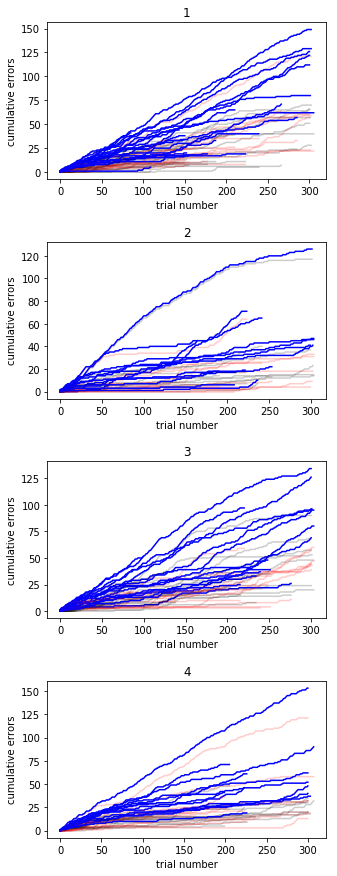

In [136]:
# cumulative error plots
f, axarr = plt.subplots(4,1,figsize = (5,15))
f.subplots_adjust(hspace=.4)
mice = ["1","2","3","4"]
for i,mouse in enumerate(mice):
    oneSidedFiles = glob(home+cageNum+mouse+"/OneSidedCues_noservo_*Licks.txt")
    halfOneSidedFiles = glob(home+cageNum+mouse+"/HalfOneSidedCue_noservo_*Licks.txt")
    AFCTrainFiles = glob(home+cageNum+mouse+"/2AFC_Train_noservo_*Licks.txt")
    allFiles = [i for i in oneSidedFiles]
    #print(allFiles)
    allFiles.extend(halfOneSidedFiles)
    allFiles.extend(AFCTrainFiles)
    #allFiles = glob(home+cageNum+mouse+"/2AFC_Train_noservo_*Licks.txt")
    fileBDays = [os.stat(path_to_file).st_birthtime for path_to_file in allFiles]
    sortedFiles = [x for _, x in sorted(zip(fileBDays,allFiles), key=lambda pair: pair[0])]
    sortedSessions = [i.split(home+cageNum+mouse+"/")[1].split("_Licks.txt")[0] for i in sortedFiles]
    #print(sortedSessions)
    c = pd(cageNum+mouse,sortedSessions,basedir='home')
    c.save_sessions()
    
    R,D = c.load_sessions()
    #print(R.keys())
    for sess in R.keys():
        errL,errR,errBoth = bd.cum_wrong(R[sess],window_size=10)
        
        axarr[i].plot(errL,color='black',alpha=.2)
        axarr[i].plot(errR,color = 'red',alpha=.2)
        axarr[i].plot(errBoth,color='blue')
        axarr[i].set_title(mouse)
        axarr[i].set_xlabel('trial number')
        axarr[i].set_ylabel('cumulative errors')
    #Rall,Dall = c.concatenate_sessions()
    #print(Rall)
    #bd.psychometrics(Rall,title=mouse,plots=['psych','RT'])
f.savefig(dropboxFolder+'training_errors.pdf',format='pdf')

In [20]:
# psychometric curves (pr(lick right) v morph)
mice = [ "2","3", "4"]
sortedSessions,Rdict,Ddict,Rall_dict,Dall_dict = {},{},{},{},{}
for i, mouse in enumerate(mice):
    
    allFiles = glob(home+cageNum+mouse+"/2AFC_Test_noServo_*Licks.txt")
    fileBDays = [os.stat(path_to_file).st_birthtime for path_to_file in allFiles]
    sortedFiles = [x for _, x in sorted(zip(fileBDays,allFiles), key=lambda pair: pair[0])]
    sortedSessions[mouse] = [i.split(home+cageNum+mouse+"/")[1].split("_Licks.txt")[0] for i in sortedFiles]
    print(sortedSessions)
    c = pd(cageNum+mouse,sortedSessions[mouse],basedir='home')
    c.save_sessions()
    
    Rdict[mouse],Ddict[mouse] = c.load_sessions()
    Rall_dict[mouse],Dall_dict[mouse] = c.concatenate_sessions()
    
    

{'2': []}


IndexError: list index out of range

/Users/markplitt/repos/2AFC_VR/lick_data/2AFC_V3/behavior_analysis.py:141: RuntimeWarning: Mean of empty slice
  combRT_mu.append(rRT_mu[i])
/Users/markplitt/repos/2AFC_VR/lick_data/2AFC_V3/behavior_analysis.py:140: RuntimeWarning: Mean of empty slice
  if np.isnan(lRT_mu[i]) and not np.isnan(rRT_mu[i]):


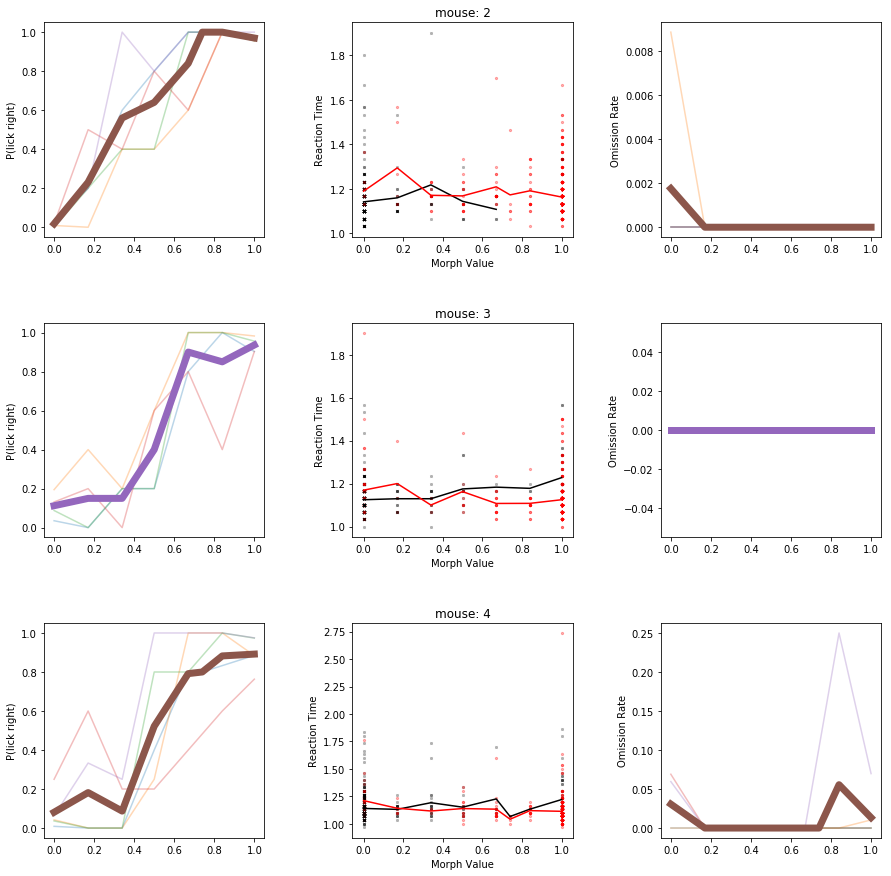

In [138]:
f,axarr = plt.subplots(len(mice),3,figsize=(15,15))
f.subplots_adjust(hspace=.4, wspace=.4)
for i, mouse in enumerate(mice):
    R,Rall = Rdict[mouse], Rall_dict[mouse]
     # get psychometric curve for each session
    for sess in sortedSessions[mouse]:
        morphVals, pport2, (lRT, rRT),muRT, omissions,(fhandles,axhandles) = bd.psychometrics(R[sess],title=mouse,plots=[])
        axarr[i,0].plot(morphVals,pport2,alpha = .3)
        axarr[i,2].plot(morphVals,omissions,alpha=.3)
        #print(lRT.shape)
        for m in range(len(lRT)):
            axarr[i,1].scatter(morphVals[m]*np.ones(lRT[m].shape),lRT[m],color='black',marker='x',s=5,alpha=.3)
            axarr[i,1].scatter(morphVals[m]*np.ones(rRT[m].shape),rRT[m],color='red',marker='o',s=5,alpha=.3)
    
    
    # get psychometric curve for combined data
    morphVals, pport2, (lRT, rRT),(lRT_mu,rRT_mu),omissions,(fhandles,axhandles) = bd.psychometrics(Rall,title=mouse,plots=[])
    axarr[i,0].plot(morphVals,pport2,linewidth=7)
    axarr[i,0].set_ylabel("P(lick right)")
    axarr[i,1].plot(morphVals,lRT_mu,color='black')
    axarr[i,1].plot(morphVals,rRT_mu,color='red')
    axarr[i,1].set_xlabel('Morph Value')
    axarr[i,1].set_ylabel('Reaction Time')
    axarr[i,1].set_title("mouse: %s" % mouse)
    axarr[i,2].plot(morphVals,omissions,linewidth=7)
    axarr[i,2].set_ylabel('Omission Rate')
    
f.savefig(dropboxFolder+'psychometrics.pdf',format='pdf')

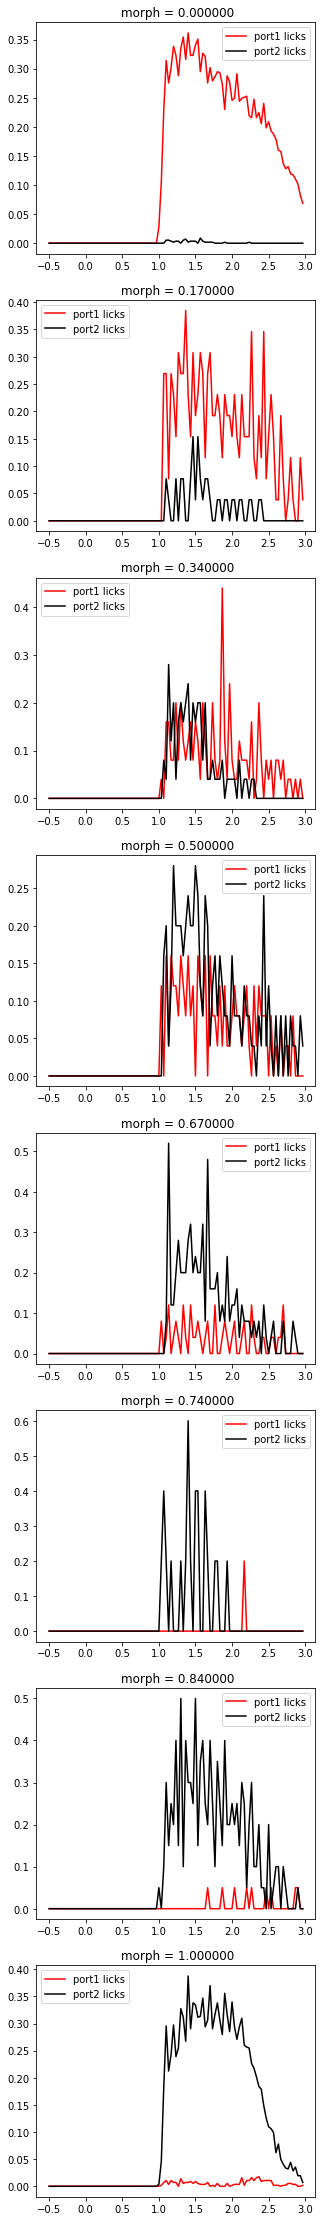

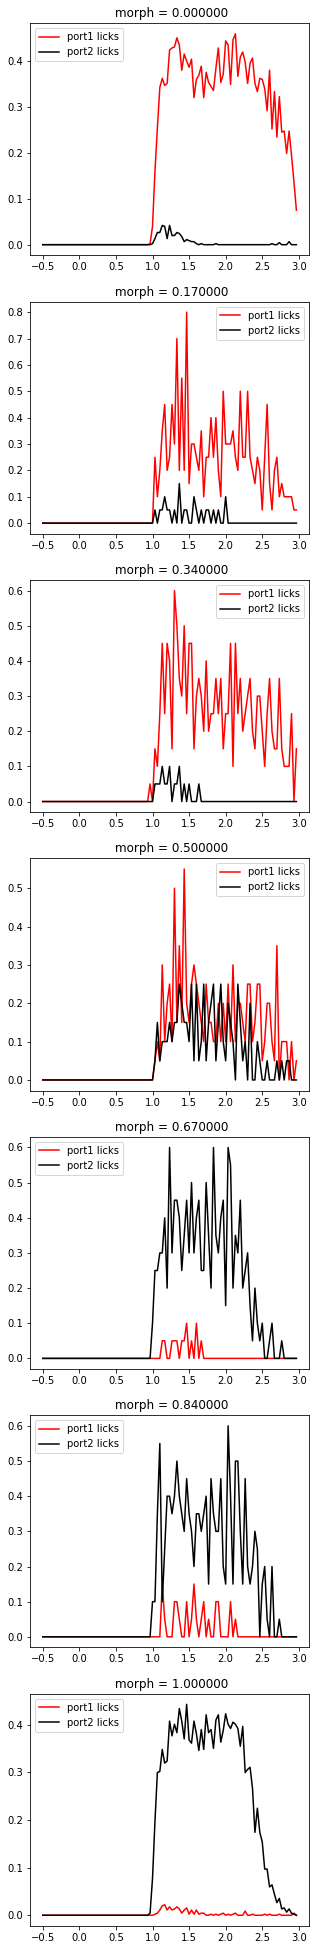

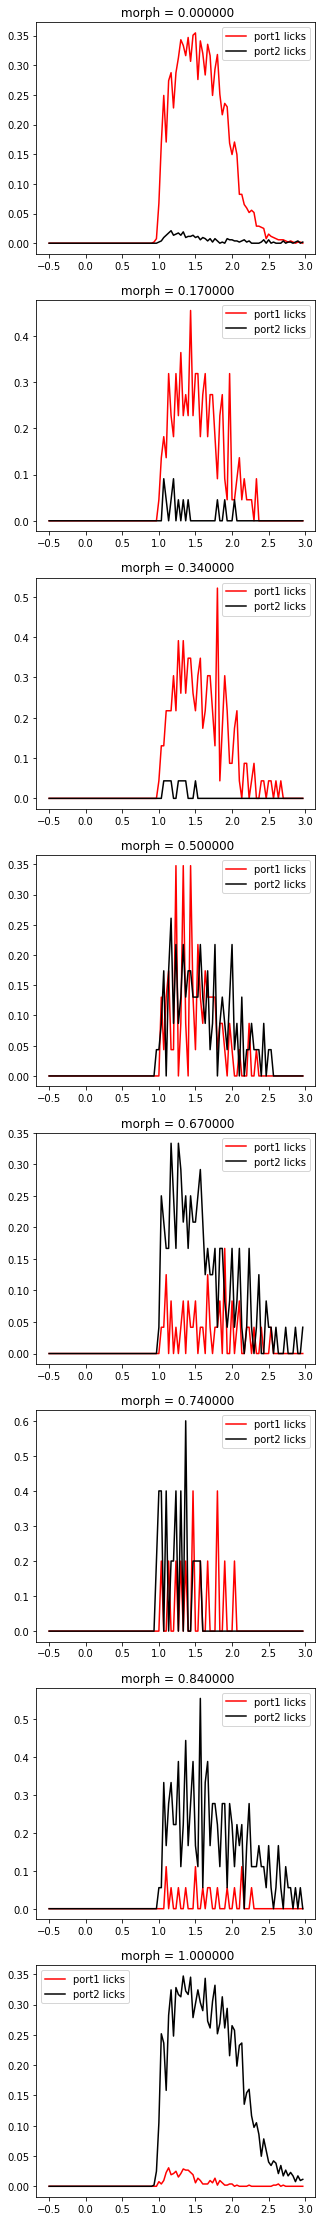

In [4]:
# reward triggered lick rate
#f,axarr = plt.subplots(7,len(mice),figsize=(15,45))
#f.subplots_adjust(hspace=.4, wspace=.4)
for i, mouse in enumerate(mice):
    R,Rall = Rdict[mouse], Rall_dict[mouse]

    lLicks,rLicks,morphVals, (f,ax) = bd.reward_trig_lick_rate(Rall,  plots="morphs")
    f.savefig(dropboxFolder+mouse+"_lickRate.png",format='png')


In [ ]:
# running speed
for i, mouse in enumerate(mice):
    R,Rall = Rdict[mouse], Rall_dict[mouse]

    # 1st half of track
    
        # v morph
        
        # correct v incorrect
        
        
        
        
    # reward LED triggered 
        
        # v morph
        
        # correct v incorrect
        


In [ ]:
# probability of licking to more probable side as a function of distance down the track that 

loading 2AFC_Generalilze_noservo_0_
dict_keys(['2AFC_Generalilze_noservo_0_'])
loading 2AFC_Generalilze_noservo_0_
dict_keys(['2AFC_Generalilze_noservo_0_'])


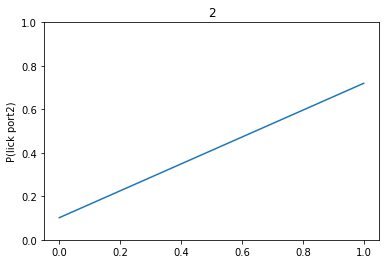

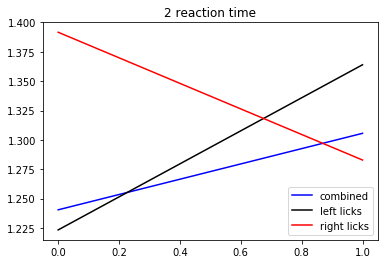

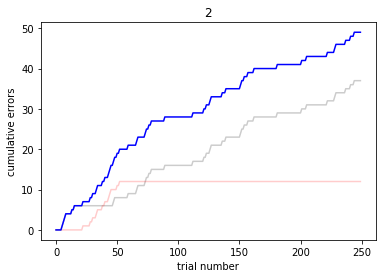

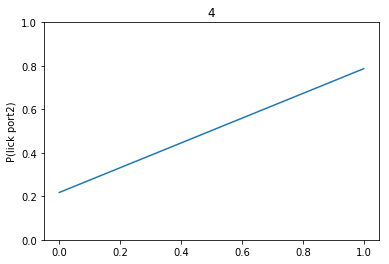

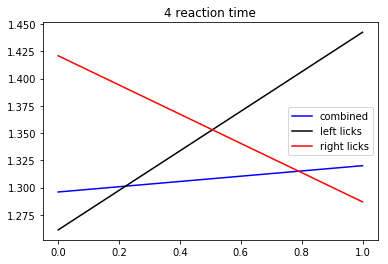

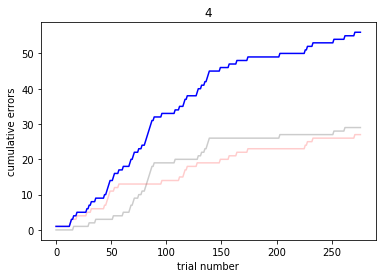

In [140]:
# 2AFC generalization
mice = ["2","4"]
for mouse in mice:
    file = "2AFC_Generalilze_noservo_0_"
    c = pd(cageNum+mouse,[file],basedir='home')
    c.save_sessions()
    
    R,D = c.load_sessions(file)
    print(R.keys())
# overall percent correct
    morphVals, pport2, (lRT, rRT),muRT, omissions,(fhandles,axhandles) = bd.psychometrics(R[file],title=mouse,plots=['psych','RT'])
    
    fhandles[0].savefig(dropboxFolder+mouse+"_gen_psychometrics.pdf",format='pdf')
    fhandles[1].savefig(dropboxFolder+mouse+"_gen_RT.pdf",format='pdf')
# percent correct 1st 50 trials vs last 50 trials
    errL,errR,errBoth = bd.cum_wrong(R[file])
    f, ax = plt.subplots()  
    ax.plot(errL,color='black',alpha=.2)
    ax.plot(errR,color = 'red',alpha=.2)
    ax.plot(errBoth,color='blue')
    ax.set_title(mouse)
    ax.set_xlabel('trial number')
    ax.set_ylabel('cumulative errors')
    f.savefig(dropboxFolder+mouse+"_gen_err.pdf",format='pdf')

# cumulative error 

# Recovery after implant


(0,)


IndexError: too many indices for array

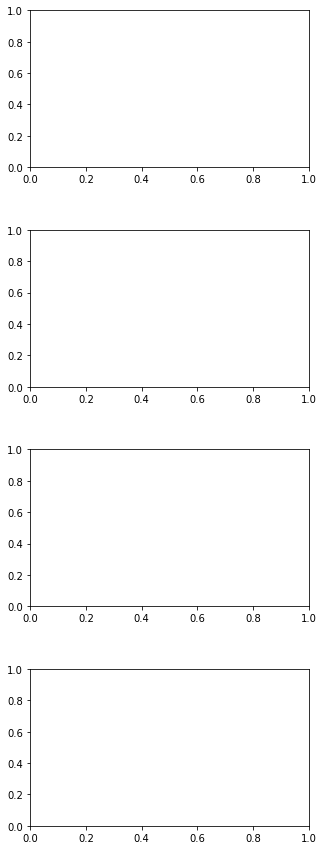

In [22]:
postop_mice = ["1", "2", "3","4"]

# Learning Curves
f, axarr = plt.subplots(4,1,figsize = (5,15))
f.subplots_adjust(hspace=.4)
for i, mouse in enumerate(mice):
    
    
    
    allFiles = glob(home+cageNum+mouse+"/2AFC_Train_PostSurg_*[0-9]__*Licks.txt")
    
    
    fileBDays = [os.stat(path_to_file).st_birthtime for path_to_file in allFiles]
    sortedFiles = [x for _, x in sorted(zip(fileBDays,allFiles), key=lambda pair: pair[0])]
    sortedSessions = [i.split(home+cageNum+mouse+"/")[1].split("_Licks.txt")[0] for i in sortedFiles]
    c = pd(cageNum+mouse,sortedSessions,basedir='home')
    c.save_sessions()
    
    R,D = c.load_sessions()
    PR = bd.plot_learning_curve(R,title=mouse,toPlot=False)
    print(PR.shape)
    axarr[i].plot(PR[:,0],'k',PR[:,1],'r')
    if i == 0:
        plt.legend(['context 1','context 2'])
        axarr[0].set_ylabel('P(lick port2)')
        axarr[0].set_xlabel('session')
        
    

    axarr[i].set_title(mouse)


In [27]:
# psychometric curves (pr(lick right) v morph)
mice = ["1", "2","3"]
sortedSessions,Rdict,Ddict,Rall_dict,Dall_dict = {},{},{},{},{}
for i, mouse in enumerate(mice):
    
    allFiles = glob(home+cageNum+mouse+"/2AFC_Test_PostSurg_*__Licks.txt")
    fileBDays = [os.stat(path_to_file).st_birthtime for path_to_file in allFiles]
    sortedFiles = [x for _, x in sorted(zip(fileBDays,allFiles), key=lambda pair: pair[0])]
    sortedSessions[mouse] = [i.split(home+cageNum+mouse+"/")[1].split("_Licks.txt")[0] for i in sortedFiles]
    print(sortedSessions)
    c = pd(cageNum+mouse,sortedSessions[mouse],basedir='home')
    c.save_sessions()
    
    Rdict[mouse],Ddict[mouse] = c.load_sessions()
    Rall_dict[mouse],Dall_dict[mouse] = c.concatenate_sessions()
    

{'1': ['2AFC_Test_PostSurg_6_imaging_cuedrop_']}
{'1': ['2AFC_Test_PostSurg_6_imaging_cuedrop_'], '2': []}


/Users/markplitt/repos/2AFC_VR/lick_data/2AFC_V3/behavior_analysis.py:346: UserWarning: genfromtxt: Empty input file: "/Volumes/mplitt/VR/2AFC_V3/4058541.2/OneSidedCues_servo2_0__Rewards.txt"
  rewardDat = np.genfromtxt(self.basestr + sess + "_Rewards.txt",dtype='float',delimiter='\t')


IndexError: too many indices for array

/Users/markplitt/repos/2AFC_VR/lick_data/2AFC_V3/behavior_analysis.py:140: RuntimeWarning: Mean of empty slice
  rRT_mu = [np.nanmean(rRT[i]) for i in range(len(rRT))]
/Users/markplitt/repos/2AFC_VR/lick_data/2AFC_V3/behavior_analysis.py:141: RuntimeWarning: Mean of empty slice
  lRT_mu = [np.nanmean(lRT[i]) for i in range(len(lRT))]


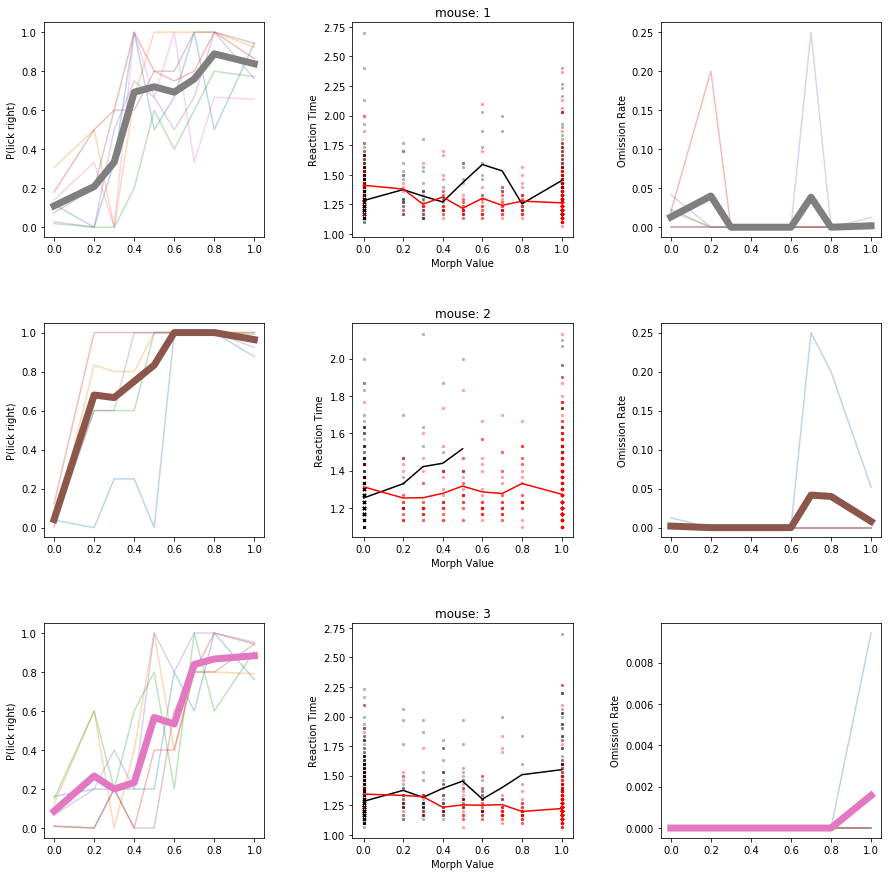

In [25]:
f,axarr = plt.subplots(len(mice),3,figsize=(15,15))
f.subplots_adjust(hspace=.4, wspace=.4)
for i, mouse in enumerate(mice):
    R,Rall = Rdict[mouse], Rall_dict[mouse]
     # get psychometric curve for each session
    for sess in sortedSessions[mouse]:
        morphVals, pport2, (lRT, rRT),muRT, omissions,(fhandles,axhandles) = bd.psychometrics(R[sess],title=mouse,plots=[])
        axarr[i,0].plot(morphVals,pport2,alpha = .3)
        axarr[i,2].plot(morphVals,omissions,alpha=.3)
        #print(lRT.shape)
        for m in range(len(lRT)):
            axarr[i,1].scatter(morphVals[m]*np.ones(lRT[m].shape),lRT[m],color='black',marker='x',s=5,alpha=.3)
            axarr[i,1].scatter(morphVals[m]*np.ones(rRT[m].shape),rRT[m],color='red',marker='o',s=5,alpha=.3)
    
    
    # get psychometric curve for combined data
    morphVals, pport2, (lRT, rRT),(lRT_mu,rRT_mu),omissions,(fhandles,axhandles) = bd.psychometrics(Rall,title=mouse,plots=[])
    axarr[i,0].plot(morphVals,pport2,linewidth=7)
    axarr[i,0].set_ylabel("P(lick right)")
    axarr[i,1].plot(morphVals,lRT_mu,color='black')
    axarr[i,1].plot(morphVals,rRT_mu,color='red')
    axarr[i,1].set_xlabel('Morph Value')
    axarr[i,1].set_ylabel('Reaction Time')
    axarr[i,1].set_title("mouse: %s" % mouse)
    axarr[i,2].plot(morphVals,omissions,linewidth=7)
    axarr[i,2].set_ylabel('Omission Rate')

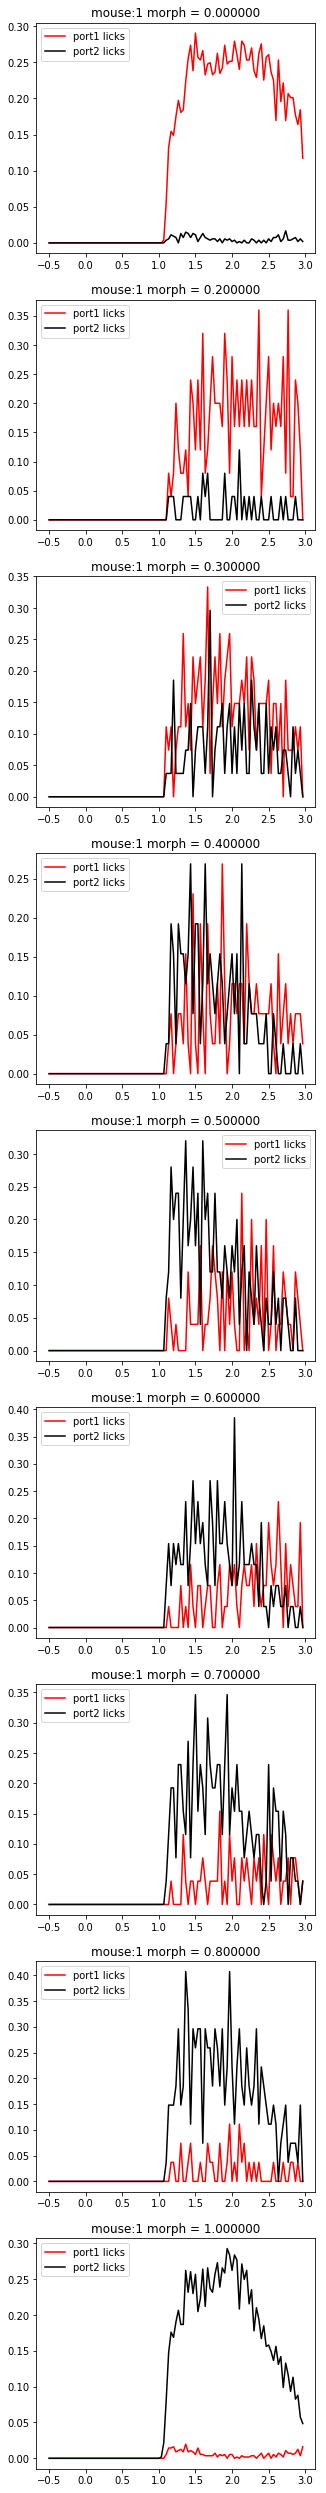

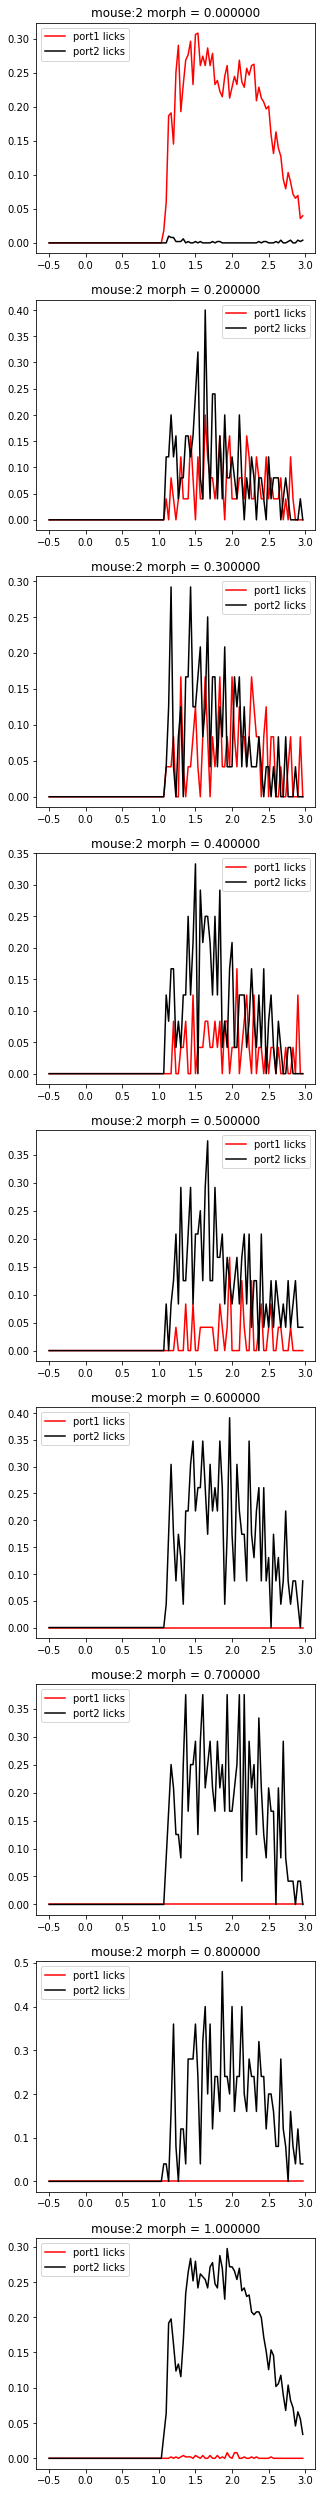

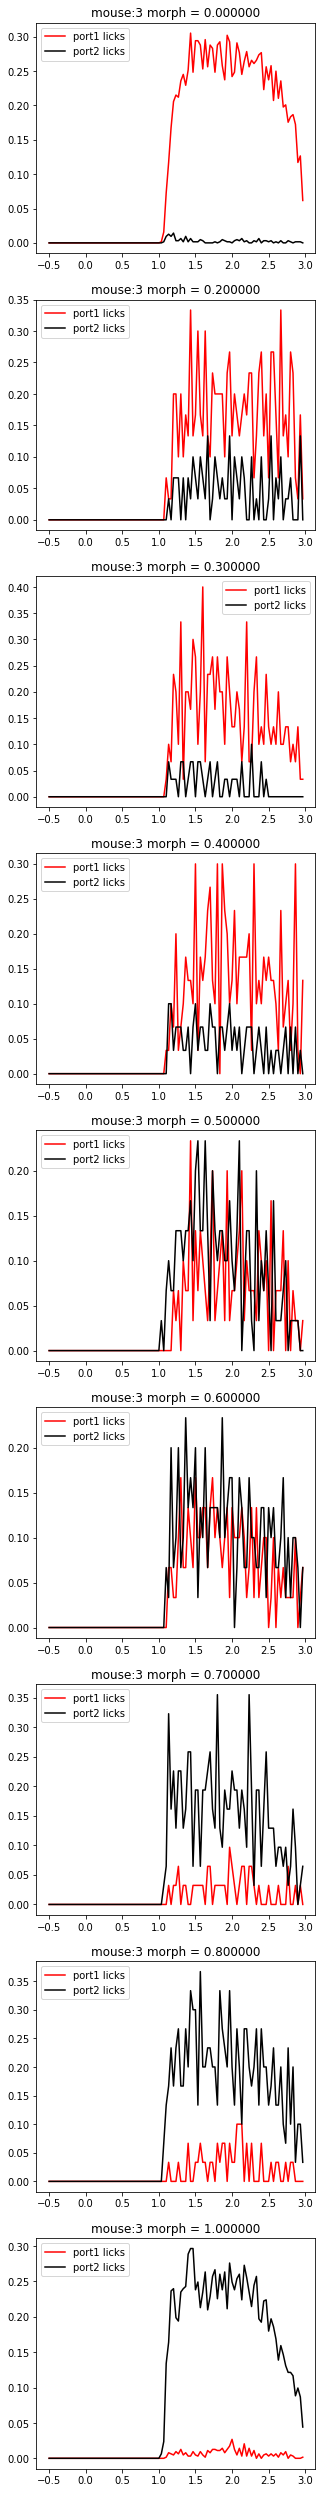

In [26]:
#f,axarr = plt.subplots(len(mice),7,figsize=(15,15))
#f.subplots_adjust(hspace=.4, wspace=.4)
for i, mouse in enumerate(mice):
    R,Rall = Rdict[mouse], Rall_dict[mouse]

    lLicks,rLicks,morphVals, (f,ax) = bd.reward_trig_lick_rate(Rall,title="mouse:"+mouse,plots="morphs")

In [39]:
# psychometric curves (pr(lick right) v morph)
mice = ["3"]
sortedSessions,Rdict,Ddict,Rall_dict,Dall_dict = {},{},{},{},{}
for i, mouse in enumerate(mice):
    
    allFiles = glob(home+cageNum+mouse+"/2AFC_Gen_Morph_PostSurg_*__Licks.txt")
    fileBDays = [os.stat(path_to_file).st_birthtime for path_to_file in allFiles]
    sortedFiles = [x for _, x in sorted(zip(fileBDays,allFiles), key=lambda pair: pair[0])]
    sortedSessions[mouse] = [i.split(home+cageNum+mouse+"/")[1].split("_Licks.txt")[0] for i in sortedFiles]
    print(sortedSessions)
    c = pd(cageNum+mouse,sortedSessions[mouse],basedir='home')
    c.save_sessions()
    
    Rdict[mouse],Ddict[mouse] = c.load_sessions()
    Rall_dict[mouse],Dall_dict[mouse] = c.concatenate_sessions()
    

{'3': ['2AFC_Gen_Morph_PostSurg_0_', '2AFC_Gen_Morph_PostSurg_1_', '2AFC_Gen_Morph_PostSurg_1_1_', '2AFC_Gen_Morph_PostSurg_2_']}


/Users/markplitt/repos/2AFC_VR/lick_data/2AFC_V3/behavior_analysis.py:140: RuntimeWarning: Mean of empty slice
  rRT_mu = [np.nanmean(rRT[i]) for i in range(len(rRT))]
/Users/markplitt/repos/2AFC_VR/lick_data/2AFC_V3/behavior_analysis.py:141: RuntimeWarning: Mean of empty slice
  lRT_mu = [np.nanmean(lRT[i]) for i in range(len(lRT))]


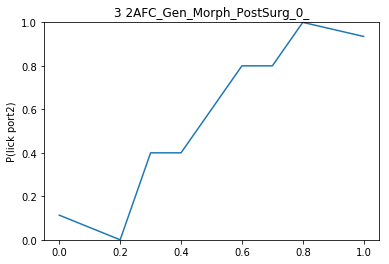

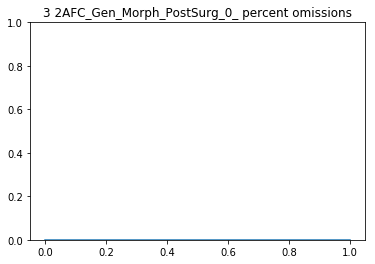

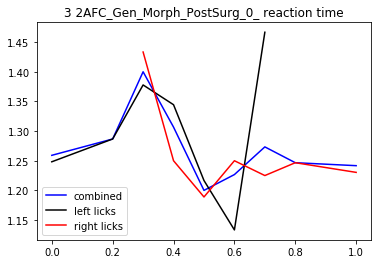

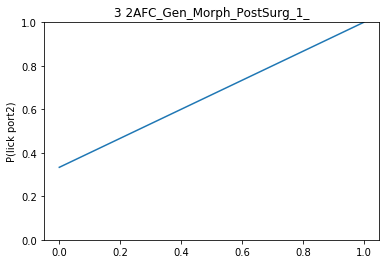

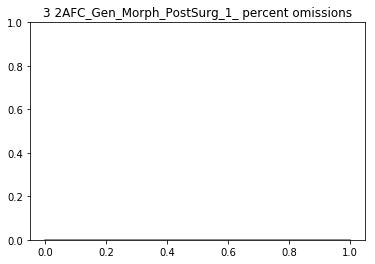

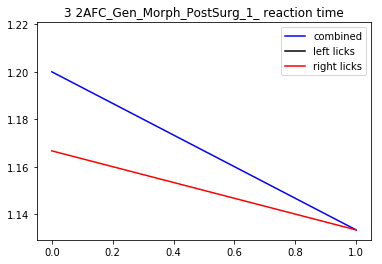

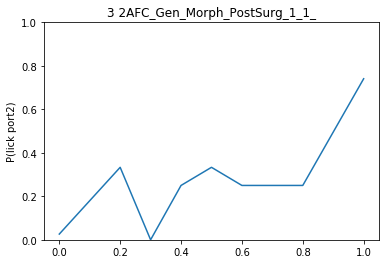

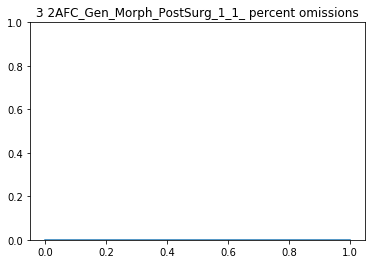

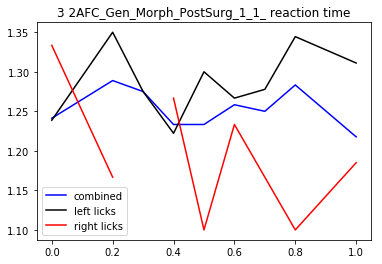

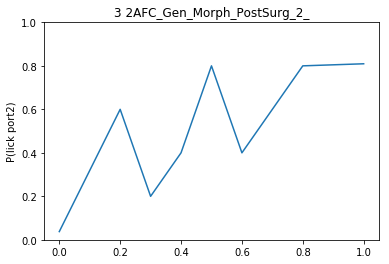

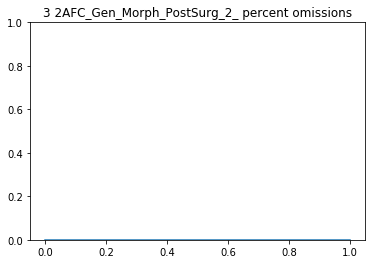

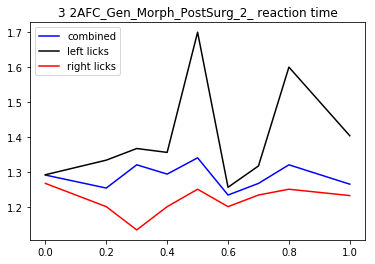

In [40]:

f.subplots_adjust(hspace=.4, wspace=.4)
for i, mouse in enumerate(mice):
    R,Rall = Rdict[mouse], Rall_dict[mouse]
     # get psychometric curve for each session
    for sess in sortedSessions[mouse]:
        morphVals, pport2, (lRT, rRT),muRT, omissions,(fhandles,axhandles) = bd.psychometrics(R[sess],title=mouse+" "+sess)
        